# Get Player NBA Data For The (2023-2024) season

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import requests

In [ ]:
import json

In [ ]:
import matplotlib.pyplot as plt

# Data Collection Using Official NBA STATS API

In [ ]:
BASE_LINK = "https://stats.nba.com"

def get_nba_stats(sub_links, headers, query_params):
  query_link = BASE_LINK + sub_links
  try:
    req = requests.get(query_link, headers=headers, params=query_params)
    req.raise_for_status()
  except:
    return None

  data = json.loads(req.text)
  return data

In [ ]:
params = {
    "LeagueID": "00",
    "Season": "2023-24",
    "SeasonType": "Regular Season",
    "PlayerOrTeam": "P",
    "Counter": 1000,
    "Sorter": "DATE",
    "Direction": "DESC",
    "DateFrom": None,
    "DateTo": None
}

headers = {
        "Host": "stats.nba.com",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0",
        "Accept": "application/json, text/plain, */*",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate, br",
        "x-nba-stats-origin": "stats",
        "x-nba-stats-token": "true",
        "Connection": "keep-alive",
        "Referer": "https://stats.nba.com/",
        "Pragma": "no-cache",
        "Cache-Control": "no-cache",
    }

nba_player_season_stats = get_nba_stats("/stats/leaguegamelog", headers, params)

# Looking At How The Data is Structured

In [ ]:
nba_player_season_stats.keys()

dict_keys(['resource', 'parameters', 'resultSets'])

In [ ]:
columns_names = nba_player_season_stats['resultSets'][0]['headers']
data = nba_player_season_stats['resultSets'][0]['rowSet']

In [ ]:
print(columns_names)

['SEASON_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'FANTASY_PTS', 'VIDEO_AVAILABLE']


In [ ]:
nba_boxscore_df = pd.DataFrame(data, columns = columns_names)

In [ ]:
nba_boxscore_df.head()

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVAILABLE
0,22023,1628380,Zach Collins,1610612759,SAS,San Antonio Spurs,0022301197,2024-04-14,SAS vs. DET,W,...,9,2,1,0,0,3,17,18,33.8,1
1,22023,203486,Mason Plumlee,1610612746,LAC,LA Clippers,0022301199,2024-04-14,LAC vs. HOU,L,...,13,4,1,2,3,3,9,-20,36.6,1
2,22023,201145,Jeff Green,1610612745,HOU,Houston Rockets,0022301199,2024-04-14,HOU @ LAC,W,...,2,0,0,1,1,1,7,-6,11.4,1
3,22023,200782,P.J. Tucker,1610612746,LAC,LA Clippers,0022301199,2024-04-14,LAC vs. HOU,L,...,0,0,0,0,0,0,0,-5,0.0,1
4,22023,1631205,Buddy Boeheim,1610612765,DET,Detroit Pistons,0022301197,2024-04-14,DET @ SAS,L,...,2,0,0,0,0,1,3,-4,5.4,1


# Exploratory Data Analysis

In [ ]:
print(f'NBA Boxscore Shape {nba_boxscore_df.shape}')
print(f'NBA Boxscore Number of Columns: {nba_boxscore_df.shape[1]}')
unique_players = nba_boxscore_df['PLAYER_ID'].unique()
print(f'Number of Unique NBA Players {len(unique_players)}')

NBA Boxscore Shape (26401, 32)
NBA Boxscore Number of Columns: 32
Number of Unique NBA Players 572


# Plot of Distribution of Fantasy Points

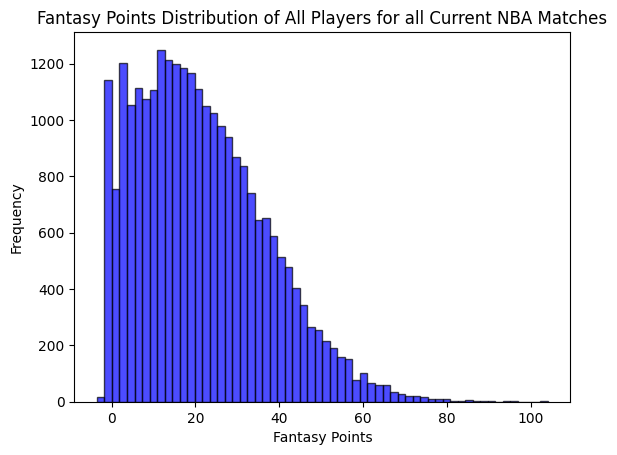

In [ ]:
def plot_all_player_fantasy_pts(nba_boxscore_df):
  plt.hist(nba_boxscore_df['FANTASY_PTS'], bins=60, color='blue', edgecolor='black', alpha=0.7)

  plt.xlabel('Fantasy Points')
  plt.ylabel('Frequency')
  plt.title('Fantasy Points Distribution of All Players for all Current NBA Matches')

  plt.show()

plot_all_player_fantasy_pts(nba_boxscore_df)

# Create Individual Pandas Dataframes with Player Statistics Associated with each Player

In [ ]:
player_dfs = {player_id: nba_boxscore_df[nba_boxscore_df['PLAYER_ID'] == player_id] for player_id in nba_boxscore_df['PLAYER_ID'].unique()}

In [ ]:
def get_all_nba_dataframes(nba_boxscore_df):
  avg_fantasy_pts_df = nba_boxscore_df.groupby(['PLAYER_ID', 'PLAYER_NAME'])['FANTASY_PTS'].mean().reset_index()
  variance_fantasy_pts_df = nba_boxscore_df.groupby(['PLAYER_ID', 'PLAYER_NAME'])['FANTASY_PTS'].var().reset_index()
  std_fantasy_pts_df = nba_boxscore_df.groupby(['PLAYER_ID', 'PLAYER_NAME'])['FANTASY_PTS'].std().reset_index()

  return avg_fantasy_pts_df, variance_fantasy_pts_df, std_fantasy_pts_df

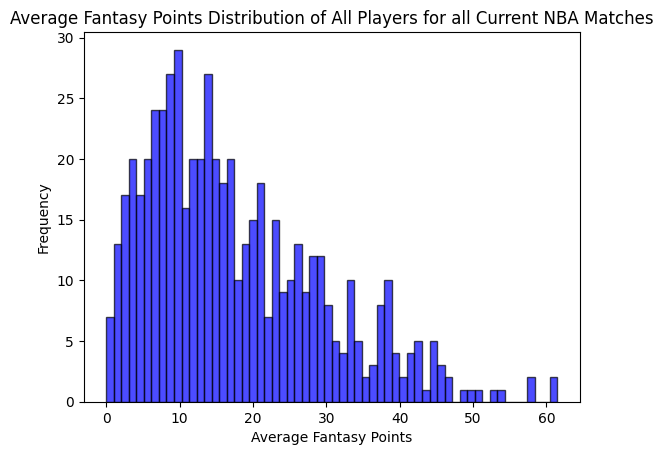

In [ ]:
avg_fantasy_pts_df = nba_boxscore_df.groupby(['PLAYER_ID', 'PLAYER_NAME'])['FANTASY_PTS'].mean().reset_index()

def plot_average_fantasy_pts(avg_fantasy_pts_df):

  avg_fantasy_pts_df.rename(columns={'FANTASY_PTS': 'AVG_FANTASY_PTS'}, inplace=True)

  plt.hist(avg_fantasy_pts_df['AVG_FANTASY_PTS'], bins=60, color='blue', edgecolor='black', alpha=0.7)

  plt.xlabel('Average Fantasy Points')
  plt.ylabel('Frequency')
  plt.title('Average Fantasy Points Distribution of All Players for all Current NBA Matches')

  plt.show()

plot_average_fantasy_pts(avg_fantasy_pts_df)


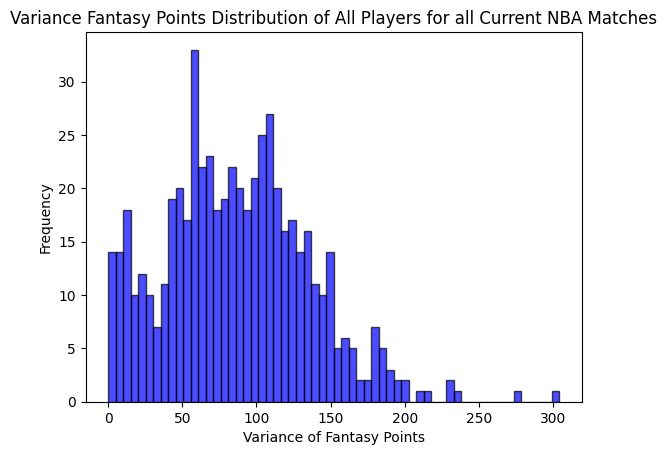

In [ ]:
variance_fantasy_pts_df = nba_boxscore_df.groupby(['PLAYER_ID', 'PLAYER_NAME'])['FANTASY_PTS'].var().reset_index()

def plot_variance_pts_df(variance_fantasy_pts_df):
  variance_fantasy_pts_df.rename(columns={'FANTASY_PTS': 'VARIANCE_FANTASY_PTS'}, inplace=True)

  plt.hist(variance_fantasy_pts_df['VARIANCE_FANTASY_PTS'], bins=60, color='blue', edgecolor='black', alpha=0.7)

  plt.xlabel('Variance of Fantasy Points')
  plt.ylabel('Frequency')
  plt.title('Variance Fantasy Points Distribution of All Players for all Current NBA Matches')

  plt.show()

plot_variance_pts_df(variance_fantasy_pts_df)

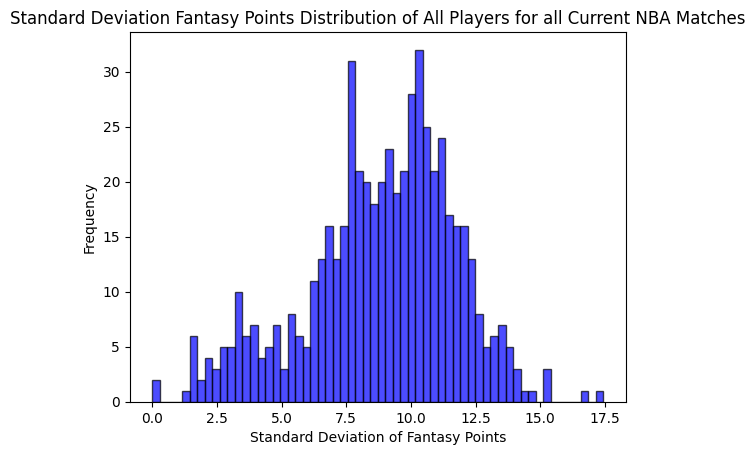

In [ ]:
std_fantasy_pts_df = nba_boxscore_df.groupby(['PLAYER_ID', 'PLAYER_NAME'])['FANTASY_PTS'].std().reset_index()
def plot_std_fantasy_pts(std_fantasy_pts_df):
  std_fantasy_pts_df.rename(columns={'FANTASY_PTS': 'STD_FANTASY_PTS'}, inplace=True)

  plt.hist(std_fantasy_pts_df['STD_FANTASY_PTS'], bins=60, color='blue', edgecolor='black', alpha=0.7)

  plt.xlabel('Standard Deviation of Fantasy Points')
  plt.ylabel('Frequency')
  plt.title('Standard Deviation Fantasy Points Distribution of All Players for all Current NBA Matches')

  plt.show()

plot_std_fantasy_pts(std_fantasy_pts_df)

<ipython-input-20-27707a096cd7>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


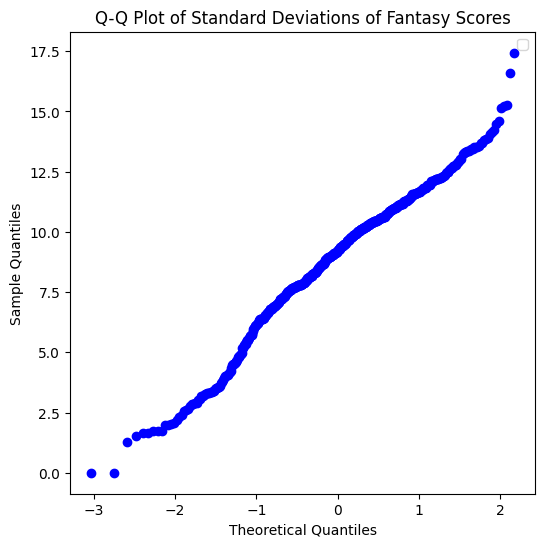

In [ ]:
import scipy.stats as stats


fig, ax = plt.subplots(figsize=(6, 6))

res = stats.probplot(std_fantasy_pts_df['STD_FANTASY_PTS'], dist="norm", plot=ax)

ax.set_title("Q-Q Plot of Standard Deviations of Fantasy Scores")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")
ax.legend()

plt.show()


# Find the Players with the Highest Fantasy Scores on Average

# Part A: Find the Most Consistent Players Among the Players with the Highest Fantasy Points in (2023-2024) Season

In [ ]:
avg_fantasy_pts_df = avg_fantasy_pts_df.sort_values(by='AVG_FANTASY_PTS', ascending=False)

top_10_percent_cutoff = int(len(avg_fantasy_pts_df) * 0.1)

top_10_percent_df = avg_fantasy_pts_df.head(top_10_percent_cutoff)

top_10_percent_df.head()

,PLAYER_ID,PLAYER_NAME,AVG_FANTASY_PTS
223,1629029,Luka Dončić,61.491429
90,203954,Joel Embiid,61.115385
97,203999,Nikola Jokić,58.344304
73,203507,Giannis Antetokounmpo,57.441096
50,203076,Anthony Davis,53.634211


# Players with the Highest Standard Deviation

### We generally see those with more play time having higher standard deviation

#### Those with little play time have a higher variability in the standard deviation of fantasy points, making them less reliable.

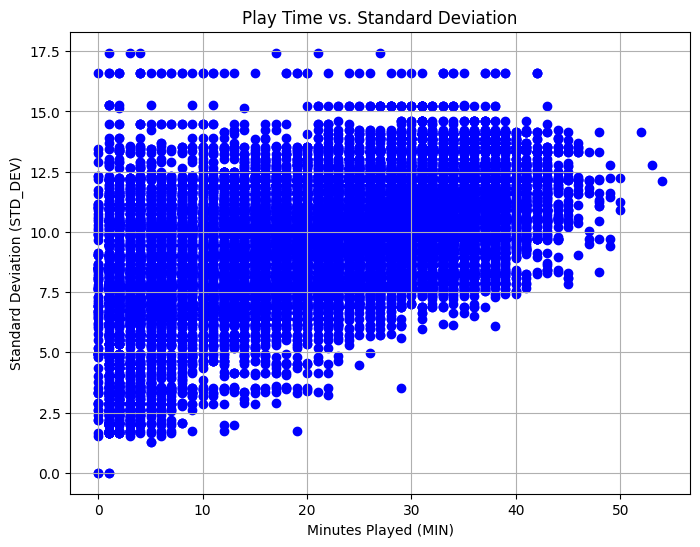

In [ ]:
std_dev_df = (
    nba_boxscore_df.groupby(['PLAYER_ID', 'PLAYER_NAME'])['FANTASY_PTS']
    .std()
    .reset_index()
)
std_dev_df.rename(columns={'FANTASY_PTS': 'STD_DEV'}, inplace=True)

play_time_vs_consistency = pd.merge(nba_boxscore_df[['PLAYER_ID', 'PLAYER_NAME', 'MIN']], std_dev_df, on=['PLAYER_ID', 'PLAYER_NAME'])

plt.figure(figsize=(8, 6))
plt.scatter(play_time_vs_consistency['MIN'], play_time_vs_consistency['STD_DEV'], color='blue')
plt.title("Play Time vs. Standard Deviation")
plt.xlabel("Minutes Played (MIN)")
plt.ylabel("Standard Deviation (STD_DEV)")
plt.grid(True)
plt.show()

In [ ]:
std_fantasy_pts_df = std_fantasy_pts_df.sort_values(by='STD_FANTASY_PTS', ascending=False)

top_10_percent_cutoff = int(len(std_fantasy_pts_df) * 0.1)

std_top_10_percent_df = std_fantasy_pts_df.head(top_10_percent_cutoff)

std_top_10_percent_df.head()

,PLAYER_ID,PLAYER_NAME,STD_FANTASY_PTS
491,1631243,Mouhamed Gueye,17.437393
413,1630625,Dalano Banton,16.575895
550,1641766,Adama Sanogo,15.271033
511,1641705,Victor Wembanyama,15.205842
165,1628391,D.J. Wilson,15.132085


# Merge Top 10% Consistency and Top 10% Average Fantasy Points

## Find players within the top 10% of average fantasy points with the highest consistency (smallest standard deviation)

In [ ]:
player_stats = nba_boxscore_df.groupby(['PLAYER_ID', 'PLAYER_NAME'])['FANTASY_PTS'].agg(['mean', 'std']).reset_index()

sorted_stats = player_stats.sort_values(by=['mean', 'std'], ascending=[False, True])

top_10_percent_cutoff = int(len(player_stats) * 0.1)

top_10_percent_mean_std_df = sorted_stats.head(top_10_percent_cutoff)

In [ ]:
top_10_percent_mean_std_df.head()

,PLAYER_ID,PLAYER_NAME,mean,std
223,1629029,Luka Dončić,61.491429,13.540265
90,203954,Joel Embiid,61.115385,14.617771
97,203999,Nikola Jokić,58.344304,13.843083
73,203507,Giannis Antetokounmpo,57.441096,13.672182
50,203076,Anthony Davis,53.634211,14.138435


In [ ]:
sort_top_10_percent_scorers_by_consistency = top_10_percent_mean_std_df.sort_values(by="std", ascending=True)

In [ ]:
sort_top_10_percent_scorers_by_consistency.head()

,PLAYER_ID,PLAYER_NAME,mean,std
138,1627783,Pascal Siakam,38.137500,9.285082
88,203944,Julius Randle,41.415217,9.650054
21,201942,DeMar DeRozan,40.588608,9.683292
134,1627759,Jaylen Brown,37.741429,9.862541
41,202695,Kawhi Leonard,42.194118,10.391729


In [ ]:
print(f'NBA Top 10 Percent Scorers Shape {sort_top_10_percent_scorers_by_consistency.shape}')

NBA Top 10 Percent Scorers Shape (57, 4)


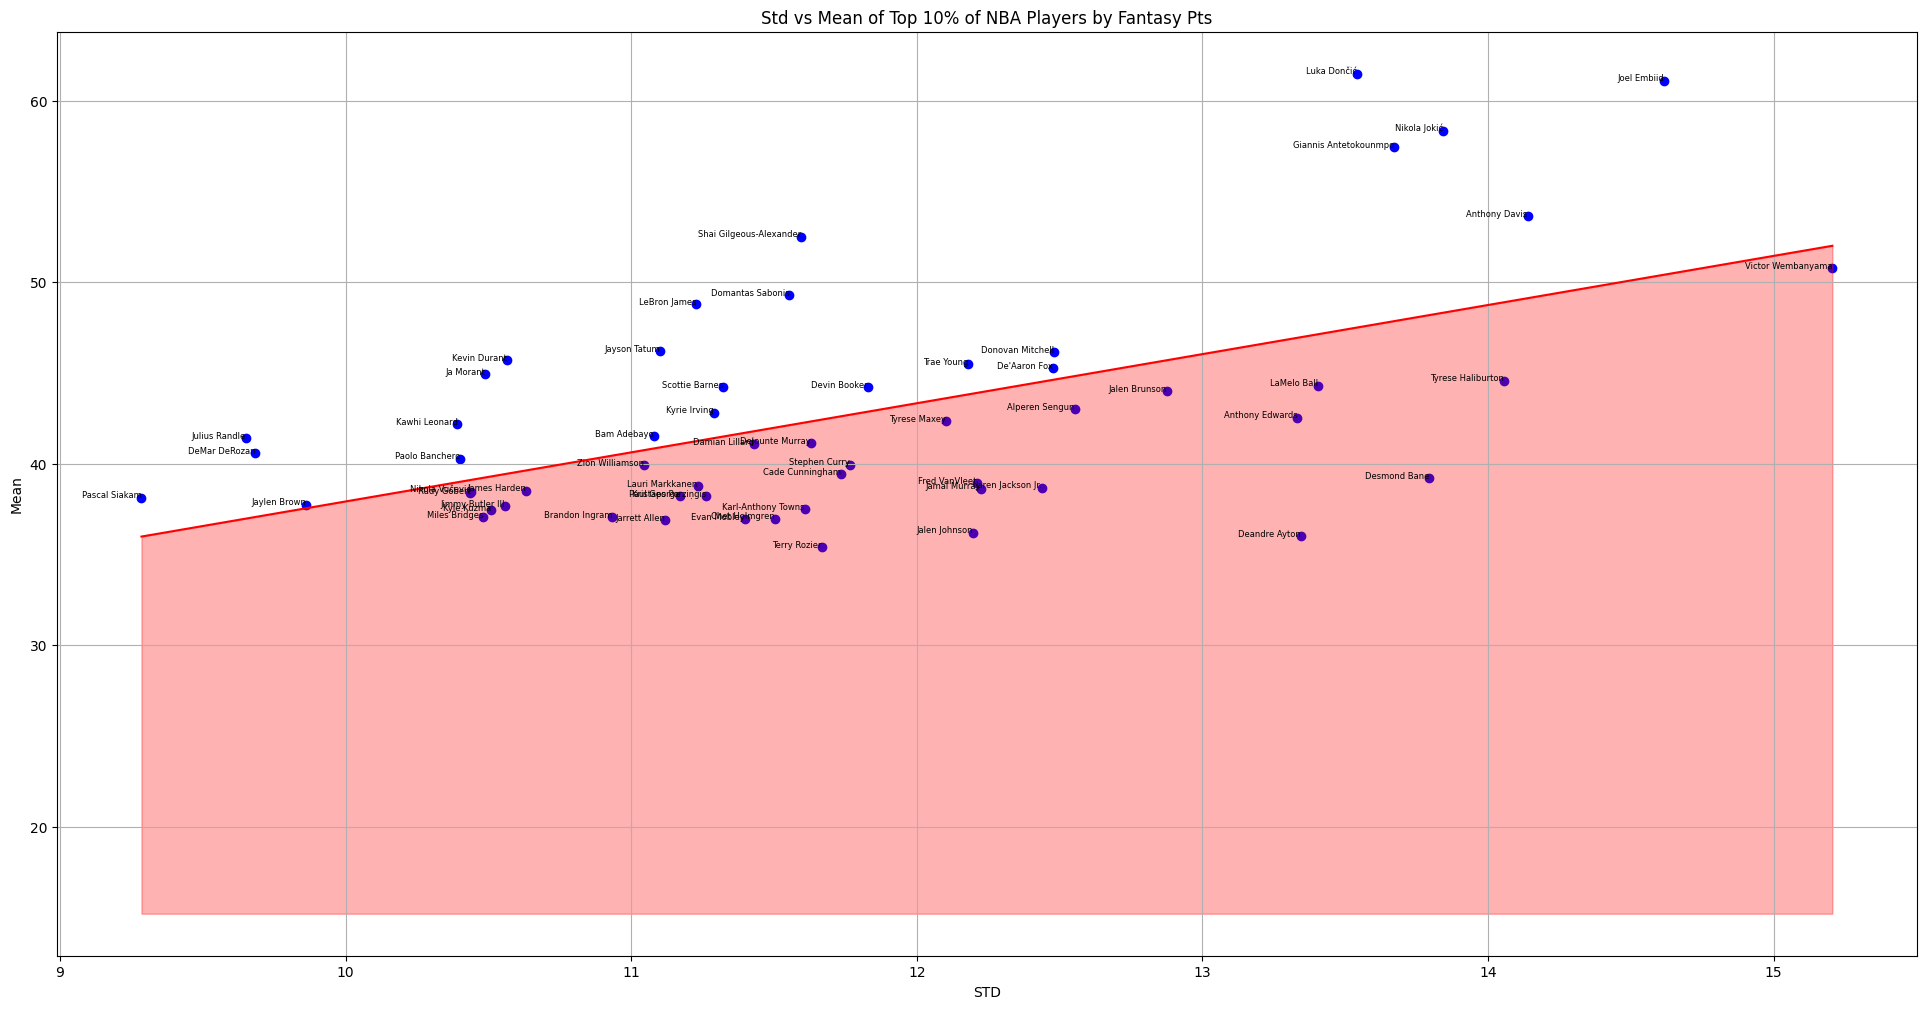

In [ ]:
plt.figure(figsize=(24, 12))
plt.scatter(sort_top_10_percent_scorers_by_consistency['std'], sort_top_10_percent_scorers_by_consistency['mean'], color='blue')
for i, row in sort_top_10_percent_scorers_by_consistency.iterrows():
    plt.text(row['std'], row['mean'], row['PLAYER_NAME'], fontsize=6, ha='right')

slope, intercept = np.polyfit(sort_top_10_percent_scorers_by_consistency['std'], sort_top_10_percent_scorers_by_consistency['mean'], 1)
x_vals = np.array([sort_top_10_percent_scorers_by_consistency['std'].min(), sort_top_10_percent_scorers_by_consistency['std'].max()])
y_vals = slope * x_vals + intercept

plt.plot(x_vals, y_vals, color='red', label="Line of Best Fit")
plt.fill_between(x_vals, y_vals, sort_top_10_percent_scorers_by_consistency['std'].max(), color='red', alpha=0.3)
plt.title("Std vs Mean of Top 10% of NBA Players by Fantasy Pts")
plt.xlabel("STD")
plt.ylabel("Mean")
plt.grid(True)
plt.show()

In [ ]:
line_values = slope * sort_top_10_percent_scorers_by_consistency['std'] + intercept

sort_top_10_percent_scorers_by_consistency['expected_mean'] = line_values

above_expected_mean_df = sort_top_10_percent_scorers_by_consistency[sort_top_10_percent_scorers_by_consistency['mean'] > sort_top_10_percent_scorers_by_consistency['expected_mean']]

# These players are the most consistent players (among the highest fantasy point players) who are above average relative to the line of best fit for consistency (standard deviation) vs mean
above_expected_mean_df

,PLAYER_ID,PLAYER_NAME,mean,std,expected_mean
138,1627783,Pascal Siakam,38.137500,9.285082,35.987740
88,203944,Julius Randle,41.415217,9.650054,36.975449
21,201942,DeMar DeRozan,40.588608,9.683292,37.065401
134,1627759,Jaylen Brown,37.741429,9.862541,37.550494
41,202695,Kawhi Leonard,42.194118,10.391729,38.982616
433,1631094,Paolo Banchero,40.278750,10.401165,39.008152
250,1629630,Ja Morant,44.944444,10.488459,39.244394
4,201142,Kevin Durant,45.720000,10.564244,39.449487
164,1628389,Bam Adebayo,41.512676,11.079143,40.842940
150,1628369,Jayson Tatum,46.218919,11.099509,40.898054


# Part B: Rank Players Based on Elo

Tier Assignments for Top 10% of NBA Players:
Luka Dončić: Tier = Challenger, Mean FP/G = 61.5, Variance = 180.7
Joel Embiid: Tier = Grandmaster, Mean FP/G = 61.1, Variance = 208.2
Nikola Jokić: Tier = Master, Mean FP/G = 58.3, Variance = 189.2
Giannis Antetokounmpo: Tier = Diamond, Mean FP/G = 57.4, Variance = 184.4
Anthony Davis: Tier = Diamond, Mean FP/G = 53.6, Variance = 197.3
Shai Gilgeous-Alexander: Tier = Emerald, Mean FP/G = 52.5, Variance = 132.7
Victor Wembanyama: Tier = Emerald, Mean FP/G = 50.8, Variance = 228.0
Domantas Sabonis: Tier = Emerald, Mean FP/G = 49.3, Variance = 131.9
LeBron James: Tier = Emerald, Mean FP/G = 48.8, Variance = 124.3
Jayson Tatum: Tier = Emerald, Mean FP/G = 46.2, Variance = 121.5
Donovan Mitchell: Tier = Platinum, Mean FP/G = 46.1, Variance = 152.9
Kevin Durant: Tier = Platinum, Mean FP/G = 45.7, Variance = 110.1
Trae Young: Tier = Platinum, Mean FP/G = 45.5, Variance = 145.6
De'Aaron Fox: Tier = Platinum, Mean FP/G = 45.3, Variance = 153.6
Ja Mo

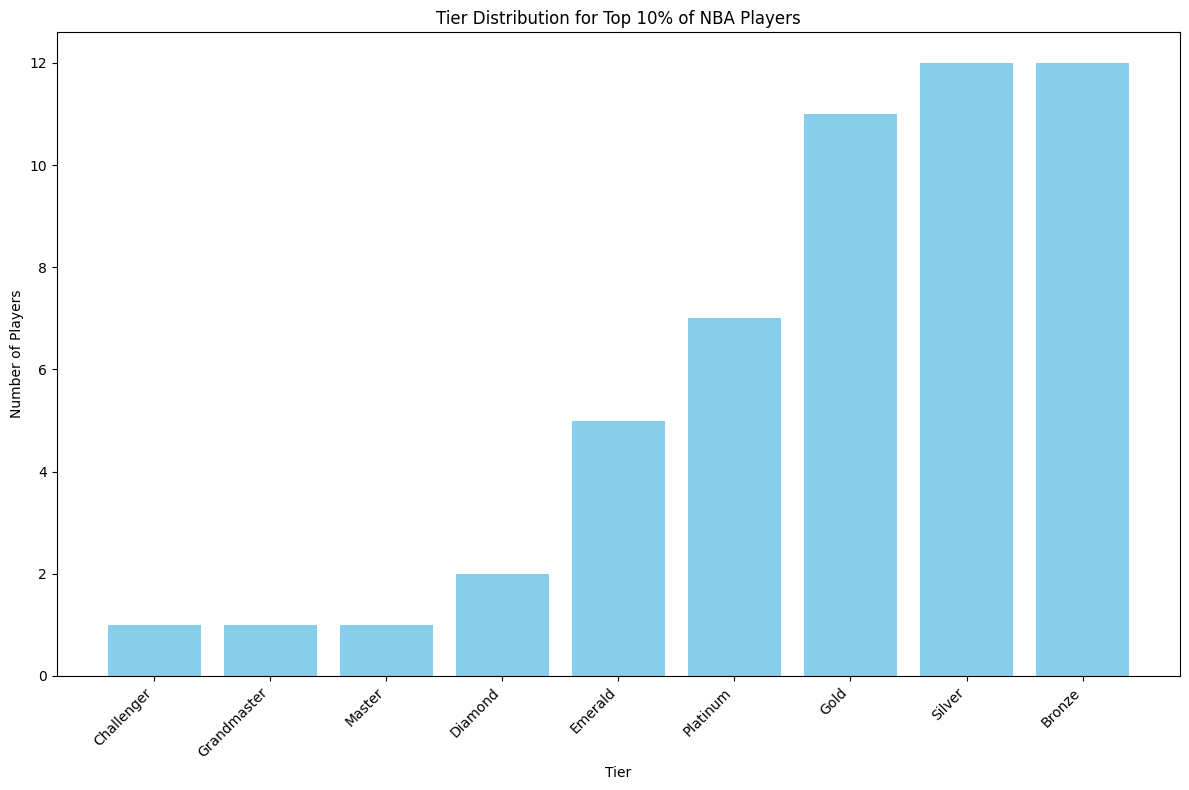

In [ ]:
import requests
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# Fetch data from NBA Stats API
BASE_LINK = "https://stats.nba.com"

def get_nba_stats(sub_links, headers, query_params):
    query_link = BASE_LINK + sub_links
    try:
        req = requests.get(query_link, headers=headers, params=query_params)
        req.raise_for_status()
    except:
        return None

    data = json.loads(req.text)
    return data

# API parameters and headers
params = {
    "LeagueID": "00",
    "Season": "2023-24",
    "SeasonType": "Regular Season",
    "PlayerOrTeam": "P",
    "Counter": 1000,
    "Sorter": "DATE",
    "Direction": "DESC",
    "DateFrom": None,
    "DateTo": None
}

headers = {
    "Host": "stats.nba.com",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0",
    "Accept": "application/json, text/plain, */*",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br",
    "x-nba-stats-origin": "stats",
    "x-nba-stats-token": "true",
    "Connection": "keep-alive",
    "Referer": "https://stats.nba.com/",
    "Pragma": "no-cache",
    "Cache-Control": "no-cache",
}

# Fetch player season stats
nba_player_season_stats = get_nba_stats("/stats/leaguegamelog", headers, params)

# Extract column names and data
column_names = nba_player_season_stats['resultSets'][0]['headers']
data = nba_player_season_stats['resultSets'][0]['rowSet']

# Map column names to indices
column_indices = {name: i for i, name in enumerate(column_names)}

# Group game logs by player
player_stats = defaultdict(list)
for game_log in data:
    player_id = game_log[column_indices["PLAYER_ID"]]
    player_name = game_log[column_indices["PLAYER_NAME"]]
    fantasy_pts = game_log[column_indices["FANTASY_PTS"]]
    player_stats[player_id].append({"name": player_name, "fantasy_pts": fantasy_pts})

# Calculate mean FP/G and variance for each player
player_rankings = []
for player_id, stats in player_stats.items():
    fps = [game["fantasy_pts"] for game in stats]
    mean_fp = np.mean(fps)
    variance = np.var(fps)
    player_rankings.append({
        "player_id": player_id,
        "player_name": stats[0]["name"],
        "mean_fp": mean_fp,
        "variance": variance
    })

# Sort players by mean FP/G (descending) to get top 10% based on fantasy score
player_rankings_sorted_by_fp = sorted(
    player_rankings,
    key=lambda x: -x["mean_fp"]  # Sort by mean FP/G (descending)
)

# Filter top 10% of players based on mean FP/G
total_players = len(player_rankings_sorted_by_fp)
top_10_percent = int(total_players * 0.1)  # 10% of players
top_players = player_rankings_sorted_by_fp[:top_10_percent]

# Function to calculate MMR
def calculate_mmr(mean_fp, variance):
    if mean_fp == 0:
        return 0
    consistency_factor = 1 - (variance / mean_fp)
    consistency_factor = max(consistency_factor, 0)  # Ensure it's not negative
    mmr = mean_fp * 42.857 * consistency_factor
    return mmr

# Calculate MMR for top 10% of players
for player in top_players:
    player["mmr"] = calculate_mmr(player["mean_fp"], player["variance"])

# Define updated tier distribution (without Iron and redistributed percentages)
tier_distribution = {
    "Challenger": 2.26,
    "Grandmaster": 2.30,
    "Master": 2.81,
    "Diamond": 4.95,
    "Emerald": 10.17,
    "Platinum": 13.59,
    "Gold": 19.43,
    "Silver": 21.92,
    "Bronze": 22.56,
}

# Assign tiers to players
tier_assignments = []
current_index = 0
for tier, percentage in tier_distribution.items():
    num_players = int((percentage / 100) * top_10_percent)
    for player in top_players[current_index:current_index + num_players]:
        player["tier"] = tier
        tier_assignments.append(player)
    current_index += num_players

# Print tier assignments
print("Tier Assignments for Top 10% of NBA Players:")
for player in tier_assignments:
    print(f"{player['player_name']}: Tier = {player['tier']}, Mean FP/G = {player['mean_fp']:.1f}, Variance = {player['variance']:.1f}")

# Visualize tier distribution
tiers = list(tier_distribution.keys())
counts = [len([p for p in tier_assignments if p["tier"] == tier]) for tier in tiers]

# Create bar plot
plt.figure(figsize=(12, 8))
plt.bar(tiers, counts, color="skyblue")

# Add labels and title
plt.xlabel("Tier")
plt.ylabel("Number of Players")
plt.title("Tier Distribution for Top 10% of NBA Players")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show plot
plt.tight_layout()
plt.show()

Tier Assignments for Top 10% of NBA Players (Based on PLUS_MINUS):
Nikola Jokić: Tier = Challenger, Mean PLUS_MINUS = 8.6, Mean MIN = 34.6, Variance = 177.1
Derrick White: Tier = Grandmaster, Mean PLUS_MINUS = 8.5, Mean MIN = 32.6, Variance = 189.5
Jayson Tatum: Tier = Master, Mean PLUS_MINUS = 8.2, Mean MIN = 35.8, Variance = 236.4
Shai Gilgeous-Alexander: Tier = Diamond, Mean PLUS_MINUS = 8.1, Mean MIN = 34.1, Variance = 195.0
OG Anunoby: Tier = Diamond, Mean PLUS_MINUS = 7.8, Mean MIN = 34.1, Variance = 176.7
Kentavious Caldwell-Pope: Tier = Emerald, Mean PLUS_MINUS = 7.5, Mean MIN = 31.6, Variance = 158.9
Kristaps Porziņģis: Tier = Emerald, Mean PLUS_MINUS = 7.3, Mean MIN = 29.6, Variance = 176.4
Joel Embiid: Tier = Emerald, Mean PLUS_MINUS = 6.8, Mean MIN = 33.6, Variance = 254.8
Jalen Brunson: Tier = Emerald, Mean PLUS_MINUS = 6.6, Mean MIN = 35.4, Variance = 203.3
Al Horford: Tier = Emerald, Mean PLUS_MINUS = 6.5, Mean MIN = 26.8, Variance = 151.8
Paul George: Tier = Platinum, M

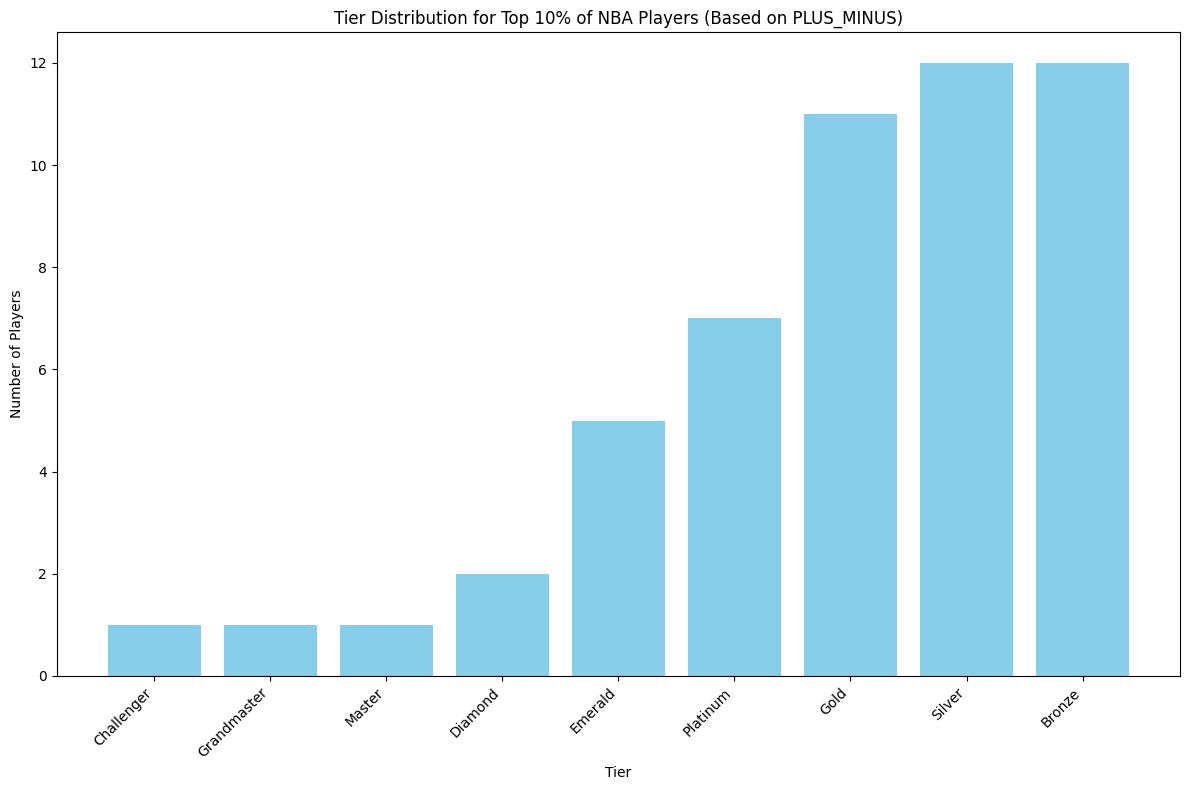

In [ ]:
import requests
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

BASE_LINK = "https://stats.nba.com"

def get_nba_stats(sub_links, headers, query_params):
    query_link = BASE_LINK + sub_links
    try:
        req = requests.get(query_link, headers=headers, params=query_params)
        req.raise_for_status()
    except:
        return None

    data = json.loads(req.text)
    return data

params = {
    "LeagueID": "00",
    "Season": "2023-24",
    "SeasonType": "Regular Season",
    "PlayerOrTeam": "P",
    "Counter": 1000,
    "Sorter": "DATE",
    "Direction": "DESC",
    "DateFrom": None,
    "DateTo": None
}

headers = {
    "Host": "stats.nba.com",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0",
    "Accept": "application/json, text/plain, */*",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br",
    "x-nba-stats-origin": "stats",
    "x-nba-stats-token": "true",
    "Connection": "keep-alive",
    "Referer": "https://stats.nba.com/",
    "Pragma": "no-cache",
    "Cache-Control": "no-cache",
}

nba_player_season_stats = get_nba_stats("/stats/leaguegamelog", headers, params)

if nba_player_season_stats is None:
    print("Failed to fetch player stats. Exiting.")
    exit()

column_names = nba_player_season_stats['resultSets'][0]['headers']
data = nba_player_season_stats['resultSets'][0]['rowSet']

column_indices = {name: i for i, name in enumerate(column_names)}

player_stats = defaultdict(list)
for game_log in data:
    player_id = game_log[column_indices["PLAYER_ID"]]
    player_name = game_log[column_indices["PLAYER_NAME"]]
    plus_minus = game_log[column_indices["PLUS_MINUS"]]
    minutes = game_log[column_indices["MIN"]]
    player_stats[player_id].append({"name": player_name, "plus_minus": plus_minus, "minutes": minutes})

player_rankings = []
for player_id, stats in player_stats.items():
    plus_minus_values = [game["plus_minus"] for game in stats]
    minutes_values = [game["minutes"] for game in stats]
    mean_plus_minus = np.mean(plus_minus_values)
    mean_minutes = np.mean(minutes_values)
    variance = np.var(plus_minus_values)
    player_rankings.append({
        "player_id": player_id,
        "player_name": stats[0]["name"],
        "mean_plus_minus": mean_plus_minus,
        "mean_minutes": mean_minutes,
        "variance": variance
    })

player_rankings_sorted_by_plus_minus = sorted(
    player_rankings,
    key=lambda x: -x["mean_plus_minus"]
)

total_players = len(player_rankings_sorted_by_plus_minus)
top_10_percent = int(total_players * 0.1)
top_players = player_rankings_sorted_by_plus_minus[:top_10_percent]

def calculate_mmr(mean_plus_minus, variance):
    if mean_plus_minus == 0:
        return 0
    consistency_factor = 1 - (variance / mean_plus_minus)
    consistency_factor = max(consistency_factor, 0)
    mmr = mean_plus_minus * 42.857 * consistency_factor
    return mmr

for player in top_players:
    player["mmr"] = calculate_mmr(player["mean_plus_minus"], player["variance"])

tier_distribution = {
    "Challenger": 2.26,
    "Grandmaster": 2.30,
    "Master": 2.81,
    "Diamond": 4.95,
    "Emerald": 10.17,
    "Platinum": 13.59,
    "Gold": 19.43,
    "Silver": 21.92,
    "Bronze": 22.56,
}

tier_assignments = []
current_index = 0
for tier, percentage in tier_distribution.items():
    num_players = int((percentage / 100) * top_10_percent)
    for player in top_players[current_index:current_index + num_players]:
        player["tier"] = tier
        tier_assignments.append(player)
    current_index += num_players

print("Tier Assignments for Top 10% of NBA Players (Based on PLUS_MINUS):")
for player in tier_assignments:
    print(f"{player['player_name']}: Tier = {player['tier']}, Mean PLUS_MINUS = {player['mean_plus_minus']:.1f}, Mean MIN = {player['mean_minutes']:.1f}, Variance = {player['variance']:.1f}")

tiers = list(tier_distribution.keys())
counts = [len([p for p in tier_assignments if p["tier"] == tier]) for tier in tiers]

plt.figure(figsize=(12, 8))
plt.bar(tiers, counts, color="skyblue")

plt.xlabel("Tier")
plt.ylabel("Number of Players")
plt.title("Tier Distribution for Top 10% of NBA Players (Based on PLUS_MINUS)")

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

# Part C: Compare Players This Season to The Statistics They Posted Last Season

In [ ]:
current_season_params = {
    "LeagueID": "00",
    "Season": "2024-25",
    "SeasonType": "Regular Season",
    "PlayerOrTeam": "P",
    "Counter": 1000,
    "Sorter": "DATE",
    "Direction": "DESC",
    "DateFrom": None,
    "DateTo": None
}


In [ ]:
current_season_data = get_nba_stats("/stats/leaguegamelog", headers, current_season_params)

In [ ]:
columns_names = current_season_data['resultSets'][0]['headers']
current_season_data = current_season_data['resultSets'][0]['rowSet']
current_season_2024_2025_nba_boxscores = pd.DataFrame(current_season_data, columns = columns_names)

In [ ]:
current_season_player_stats = current_season_2024_2025_nba_boxscores.groupby(['PLAYER_ID', 'PLAYER_NAME'])['FANTASY_PTS'].agg(['mean', 'std']).reset_index()

current_season_sorted_stats = current_season_player_stats.sort_values(by=['mean', 'std'], ascending=[False, True])

top_10_percent_cutoff = int(len(current_season_player_stats) * 0.1)

current_season_top_10_percent_mean_std_df = current_season_sorted_stats.head(top_10_percent_cutoff)

In [ ]:
current_season_sort_top_10_percent_scorers_by_consistency = current_season_top_10_percent_mean_std_df.sort_values(by="std", ascending=True)

In [ ]:
print(f'2024-2025 NBA Top 10 Percent Scorers Shape {current_season_sort_top_10_percent_scorers_by_consistency.shape}')

2024-2025 NBA Top 10 Percent Scorers Shape (55, 4)


In [ ]:
merged_season_player_stats = pd.merge(current_season_sort_top_10_percent_scorers_by_consistency, sort_top_10_percent_scorers_by_consistency, on=['PLAYER_ID', 'PLAYER_NAME'], suffixes=('_df1', '_df2'))

merged_season_player_stats['mean_delta'] = merged_season_player_stats['mean_df1'] - merged_season_player_stats['mean_df2']
merged_season_player_stats['std_delta'] = merged_season_player_stats['std_df1'] - merged_season_player_stats['std_df2']


In [ ]:
merged_season_player_stats.head()

,PLAYER_ID,PLAYER_NAME,mean_df1,std_df1,mean_df2,std_df2,expected_mean,mean_delta,std_delta
0,1627759,Jaylen Brown,39.496364,8.943339,37.741429,9.862541,37.550494,1.754935,-0.919201
1,1627783,Pascal Siakam,37.286154,9.290921,38.137500,9.285082,35.987740,-0.851346,0.005839
2,201142,Kevin Durant,43.907407,9.384147,45.720000,10.564244,39.449487,-1.812593,-1.180097
3,204001,Kristaps Porziņģis,36.106250,9.643281,38.215789,11.261245,41.335756,-2.109539,-1.617964
4,1630567,Scottie Barnes,42.840385,10.244487,44.205000,11.322430,41.501340,-1.364615,-1.077944


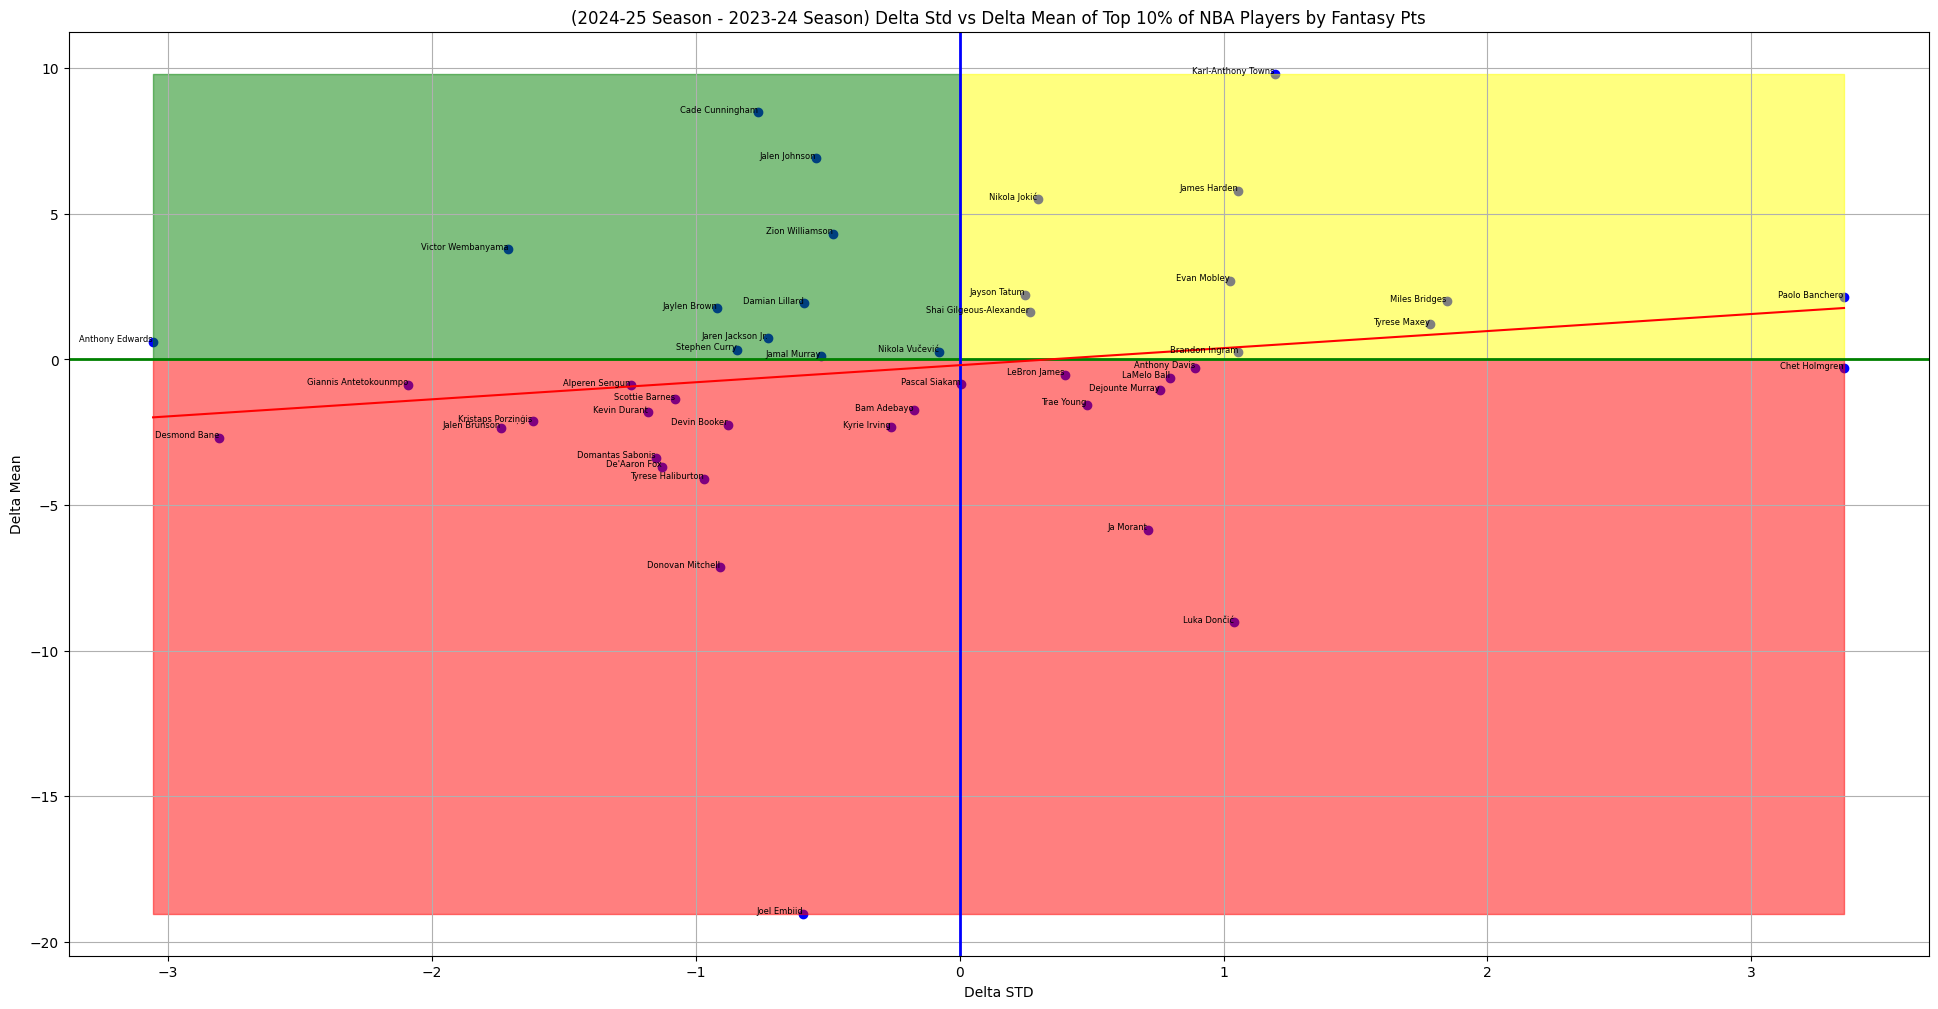

In [ ]:
plt.figure(figsize=(24, 12))
plt.scatter(merged_season_player_stats['std_delta'], merged_season_player_stats['mean_delta'], color='blue')
for i, row in merged_season_player_stats.iterrows():
    plt.text(row['std_delta'], row['mean_delta'], row['PLAYER_NAME'], fontsize=6, ha='right')

slope, intercept = np.polyfit(merged_season_player_stats['std_delta'], merged_season_player_stats['mean_delta'], 1)
x_vals = np.array([merged_season_player_stats['std_delta'].min(), merged_season_player_stats['std_delta'].max()])
y_vals = slope * x_vals + intercept

plt.axhline(y=0, color='green', linestyle='-', linewidth=2)

plt.axvline(x=0, color='blue', linestyle='-', linewidth=2)

plt.fill_betweenx(y=[min(merged_season_player_stats['mean_delta']), 0], x1=min(merged_season_player_stats['std_delta']), x2=0, color='red', alpha=0.5)

plt.fill_betweenx(y=[min(merged_season_player_stats['mean_delta']), 0], x1=max(merged_season_player_stats['std_delta']), x2=0, color='red', alpha=0.5)

plt.fill_betweenx(y=[max(merged_season_player_stats['mean_delta']), 0], x1=max(merged_season_player_stats['std_delta']), x2=0, color='yellow', alpha=0.5)
plt.fill_betweenx(y=[max(merged_season_player_stats['mean_delta']), 0], x1=min(merged_season_player_stats['std_delta']), x2=0, color='green', alpha=0.5)

plt.plot(x_vals, y_vals, color='red', label="Line of Best Fit")
plt.title("(2024-25 Season - 2023-24 Season) Delta Std vs Delta Mean of Top 10% of NBA Players by Fantasy Pts")
plt.xlabel("Delta STD")
plt.ylabel("Delta Mean")
plt.grid(True)
plt.show()

In [ ]:
players_with_most_improvement_from_last_season = merged_season_player_stats[
    (merged_season_player_stats['mean_delta'] > 0) &
    (merged_season_player_stats['std_delta'] > 0)
]
players_with_most_improvement_from_last_season

,PLAYER_ID,PLAYER_NAME,mean_df1,std_df1,mean_df2,std_df2,expected_mean,mean_delta,std_delta
19,1628369,Jayson Tatum,48.445161,11.348094,46.218919,11.099509,40.898054,2.226242,0.248586
25,201935,James Harden,44.306250,11.685887,38.511111,10.630776,39.629541,5.795139,1.055111
28,1628983,Shai Gilgeous-Alexander,54.131250,11.860537,52.513333,11.595273,42.239724,1.617917,0.265264
29,1627742,Brandon Ingram,37.305556,11.988155,37.067188,10.932550,40.446221,0.238368,1.055604
30,1628970,Miles Bridges,39.073077,12.328289,37.065217,10.482462,39.228164,2.007860,1.845827
32,1630596,Evan Mobley,39.655932,12.421648,36.952000,11.398930,41.708368,2.703932,1.022718
34,1626157,Karl-Anthony Towns,47.320690,12.800449,37.508065,11.607068,42.271644,9.812625,1.193381
37,1631094,Paolo Banchero,42.408824,13.750733,40.278750,10.401165,39.008152,2.130074,3.349568
38,1630178,Tyrese Maxey,43.563462,13.885315,42.358571,12.103844,43.616050,1.204890,1.781471
40,203999,Nikola Jokić,63.845902,14.138547,58.344304,13.843083,48.322890,5.501598,0.295464


In [ ]:
top_10_percent_23_24_season, top_10_percent_24_25_season = set(sort_top_10_percent_scorers_by_consistency['PLAYER_NAME']), set(current_season_sort_top_10_percent_scorers_by_consistency['PLAYER_NAME'])

In [ ]:
print(f'Players Who Are Top 10% 2024/2025 and 2023/2024 Seasons {top_10_percent_23_24_season.intersection(top_10_percent_24_25_season)}')

Players Who Are Top 10% 2024/2025 and 2023/2024 Seasons {'Desmond Bane', 'Stephen Curry', 'Paolo Banchero', 'Kristaps Porziņģis', 'Evan Mobley', 'Scottie Barnes', 'Miles Bridges', 'Trae Young', 'Alperen Sengun', 'Tyrese Haliburton', 'Nikola Vučević', 'Jalen Brunson', 'Anthony Davis', "De'Aaron Fox", 'Brandon Ingram', 'Nikola Jokić', 'Bam Adebayo', 'Jalen Johnson', 'Karl-Anthony Towns', 'Victor Wembanyama', 'Joel Embiid', 'Kevin Durant', 'James Harden', 'Damian Lillard', 'Anthony Edwards', 'Dejounte Murray', 'Cade Cunningham', 'Jaren Jackson Jr.', 'Ja Morant', 'Kyrie Irving', 'Giannis Antetokounmpo', 'Luka Dončić', 'Jamal Murray', 'Zion Williamson', 'Chet Holmgren', 'Shai Gilgeous-Alexander', 'Domantas Sabonis', 'Jayson Tatum', 'Donovan Mitchell', 'Devin Booker', 'LeBron James', 'LaMelo Ball', 'Pascal Siakam', 'Tyrese Maxey', 'Jaylen Brown'}


In [ ]:
print(f'Players Who Were Top 10% 2023/2024 Season But Not This Season {top_10_percent_23_24_season.difference(top_10_percent_24_25_season)}')

Players Who Were Top 10% 2023/2024 Season But Not This Season {'Lauri Markkanen', 'Deandre Ayton', 'Rudy Gobert', 'DeMar DeRozan', 'Paul George', 'Fred VanVleet', 'Jarrett Allen', 'Jimmy Butler III', 'Julius Randle', 'Kyle Kuzma', 'Kawhi Leonard', 'Terry Rozier'}


In [ ]:
print(f'Players Who Are Top 10% 2024/2025 Season But Not in 2023/2024 Season {top_10_percent_24_25_season.difference(top_10_percent_23_24_season)}')

Players Who Are Top 10% 2024/2025 Season But Not in 2023/2024 Season {'RJ Barrett', 'Jalen Williams', 'Trey Murphy III', 'Josh Hart', 'Zach LaVine', 'Franz Wagner', 'Tyler Herro', 'Ivica Zubac', 'Dyson Daniels', 'Walker Kessler'}


# Part D: Player Efficiency Plots


In [ ]:
import pandas as pd

plus_minus_df = pd.DataFrame(player_rankings_sorted_by_plus_minus)  # The data you posted
fantasy_df = pd.DataFrame(player_rankings_sorted_by_fp)  # Your fantasy stats

# Rename columns to match plotting code
plus_minus_df = plus_minus_df.rename(columns={"mean_plus_minus": "mean_plus_minus"})
fantasy_df = fantasy_df.rename(columns={"mean_fp": "mean_fp", "variance": "fantasy_variance"})

# Merge dataframes on player_id
player_efficiency_df = pd.merge(
    plus_minus_df[['player_id', 'player_name', 'mean_plus_minus']],
    fantasy_df[['player_id', 'mean_fp', 'fantasy_variance']],
    on="player_id",
    how="inner"
)

# Compute standard deviation from variance
player_efficiency_df["std_fp"] = player_efficiency_df["fantasy_variance"].apply(lambda x: x**0.5)

# Sort by mean_fp in descending order (highest mean_fp first)
player_efficiency_df = player_efficiency_df.sort_values(by="mean_fp", ascending=False)

# Select the top 10% of players
total_players = len(player_efficiency_df)
top_10_percent = int(total_players * 0.1)
player_efficiency_df = player_efficiency_df.iloc[:top_10_percent]  # Keep only the top 10%

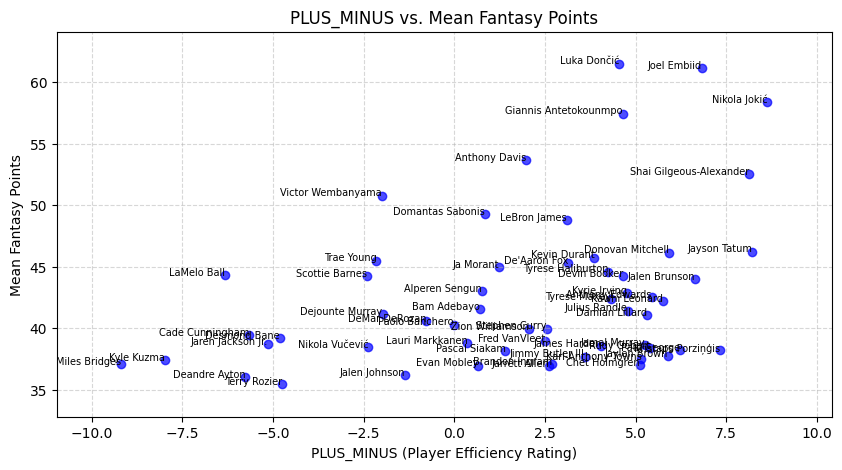

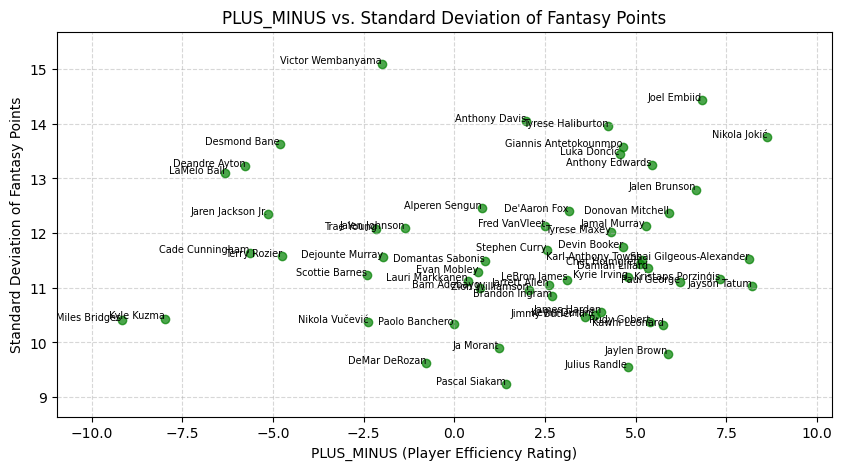

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute tighter bounds to reduce excess spacing
x_range = max(player_efficiency_df['mean_plus_minus']) - min(player_efficiency_df['mean_plus_minus'])
y1_range = max(player_efficiency_df['mean_fp']) - min(player_efficiency_df['mean_fp'])
y2_range = max(player_efficiency_df['std_fp']) - min(player_efficiency_df['std_fp'])

# Reduce bounds to tighten spacing
x_min = min(player_efficiency_df['mean_plus_minus']) - 0.1 * x_range
x_max = max(player_efficiency_df['mean_plus_minus']) + 0.1 * x_range

y1_min = min(player_efficiency_df['mean_fp']) - 0.1 * y1_range
y1_max = max(player_efficiency_df['mean_fp']) + 0.1 * y1_range

y2_min = min(player_efficiency_df['std_fp']) - 0.1 * y2_range
y2_max = max(player_efficiency_df['std_fp']) + 0.1 * y2_range

# --- PLOT 1: PLUS_MINUS vs. Mean Fantasy Points ---
plt.figure(figsize=(10, 5))
plt.scatter(player_efficiency_df['mean_plus_minus'], player_efficiency_df['mean_fp'], color='blue', alpha=0.7)
plt.xlabel("PLUS_MINUS (Player Efficiency Rating)")
plt.ylabel("Mean Fantasy Points")
plt.title("PLUS_MINUS vs. Mean Fantasy Points")
plt.xlim(x_min, x_max)
plt.ylim(y1_min, y1_max)

# Annotate players
for i, row in player_efficiency_df.iterrows():
    plt.text(row['mean_plus_minus'], row['mean_fp'], row['player_name'], fontsize=7, ha='right')

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- PLOT 2: PLUS_MINUS vs. Standard Deviation of Fantasy Points ---
plt.figure(figsize=(10, 5))
plt.scatter(player_efficiency_df['mean_plus_minus'], player_efficiency_df['std_fp'], color='green', alpha=0.7)
plt.xlabel("PLUS_MINUS (Player Efficiency Rating)")
plt.ylabel("Standard Deviation of Fantasy Points")
plt.title("PLUS_MINUS vs. Standard Deviation of Fantasy Points")
plt.xlim(x_min, x_max)
plt.ylim(y2_min, y2_max)

# Annotate players
for i, row in player_efficiency_df.iterrows():
    plt.text(row['mean_plus_minus'], row['std_fp'], row['player_name'], fontsize=7, ha='right')

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

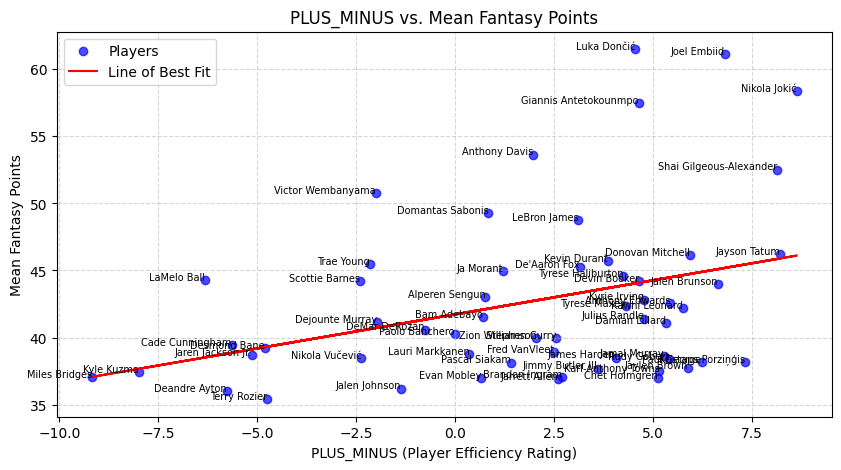

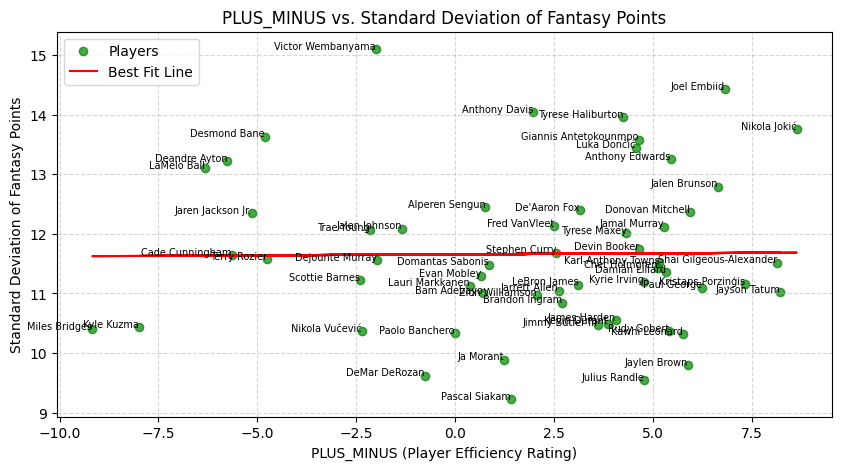


Players above the expected mean in PLUS_MINUS vs. Mean Fantasy Points:
                 player_name     std_fp  expected_mean_fp
42               Luka Dončić  13.443201         44.040626
7                Joel Embiid  14.429147         45.189143
0               Nikola Jokić  13.755190         46.108821
40     Giannis Antetokounmpo  13.578214         44.084617
119            Anthony Davis  14.045111         42.729684
3    Shai Gilgeous-Alexander  11.517712         45.855316
401        Victor Wembanyama  15.098379         40.713291
180         Domantas Sabonis  11.483029         42.155154
74              LeBron James  11.148138         43.307651
2               Jayson Tatum  11.024257         45.897374
13          Donovan Mitchell  12.365294         44.735880
53              Kevin Durant  10.493579         43.690253
413               Trae Young  12.066146         40.638115
72              De'Aaron Fox  12.392879         43.325904
154                Ja Morant   9.888614         42.348365


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute Line of Best Fit for Mean Fantasy Points
slope_fp, intercept_fp = np.polyfit(player_efficiency_df['mean_plus_minus'], player_efficiency_df['mean_fp'], 1)
player_efficiency_df['expected_mean_fp'] = player_efficiency_df['mean_plus_minus'] * slope_fp + intercept_fp

# Get players **above** the expected mean line
above_expected_mean_df = player_efficiency_df[player_efficiency_df['mean_fp'] > player_efficiency_df['expected_mean_fp']]

# --- PLOT 1: PLUS_MINUS vs. Mean Fantasy Points ---
plt.figure(figsize=(10, 5))
plt.scatter(player_efficiency_df['mean_plus_minus'], player_efficiency_df['mean_fp'], color='blue', alpha=0.7, label="Players")
plt.plot(player_efficiency_df['mean_plus_minus'], player_efficiency_df['expected_mean_fp'], color='red', label="Line of Best Fit")
plt.xlabel("PLUS_MINUS (Player Efficiency Rating)")
plt.ylabel("Mean Fantasy Points")
plt.title("PLUS_MINUS vs. Mean Fantasy Points")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Annotate **all** players for consistency
for i, row in player_efficiency_df.iterrows():
    plt.text(row['mean_plus_minus'], row['mean_fp'], row['player_name'], fontsize=7, ha='right')

plt.show()

# --- Compute Line of Best Fit for Standard Deviation ---
slope_std, intercept_std = np.polyfit(player_efficiency_df['mean_plus_minus'], player_efficiency_df['std_fp'], 1)
player_efficiency_df['expected_std_fp'] = player_efficiency_df['mean_plus_minus'] * slope_std + intercept_std

# --- PLOT 2: PLUS_MINUS vs. Standard Deviation of Fantasy Points ---
plt.figure(figsize=(10, 5))
plt.scatter(player_efficiency_df['mean_plus_minus'], player_efficiency_df['std_fp'], color='green', alpha=0.7, label="Players")
plt.plot(player_efficiency_df['mean_plus_minus'], player_efficiency_df['expected_std_fp'], color='red', label="Best Fit Line")
plt.xlabel("PLUS_MINUS (Player Efficiency Rating)")
plt.ylabel("Standard Deviation of Fantasy Points")
plt.title("PLUS_MINUS vs. Standard Deviation of Fantasy Points")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Annotate **all** players (now same as Plot 1)
for i, row in player_efficiency_df.iterrows():
    plt.text(row['mean_plus_minus'], row['std_fp'], row['player_name'], fontsize=7, ha='right')

plt.show()

# Print players above expected mean
print("\nPlayers above the expected mean in PLUS_MINUS vs. Mean Fantasy Points:")
print(above_expected_mean_df[['player_name', 'std_fp', 'expected_mean_fp']])